# Analysis

**Hypothesis**: We hypothesize that mitochondrial gene expression, as indicated by percent.mt, increases with age in the aging brain and that this increase is cell type–specific. In particular, neurogenic populations (Astrocyte_qNSC, Neuroblast_1, Neuroblast_2, Neuron) and microglia will exhibit a stronger positive correlation, suggesting that mitochondrial stress might play a pivotal role in cellular aging and potentially drive divergent aging mechanisms in these distinct cell types.

In [ ]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Set up visualization defaults for better plots
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figsize = (8, 8)
sc.settings.dpi = 100
sc.settings.facecolor = 'white'
warnings.filterwarnings('ignore')

# Set Matplotlib and Seaborn styles for better visualization
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['savefig.dpi'] = 150
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.2)

# Load data
print("Loading data...")
adata = sc.read_h5ad("/scratch/users/salber/final_aging_brain_eric.h5ad")
print(f"Data loaded: {adata.shape[0]} cells and {adata.shape[1]} genes")


# Analysis Plan

**Hypothesis**: We hypothesize that mitochondrial gene expression, as indicated by percent.mt, increases with age in the aging brain and that this increase is cell type–specific. In particular, neurogenic populations (Astrocyte_qNSC, Neuroblast_1, Neuroblast_2, Neuron) and microglia will exhibit a stronger positive correlation, suggesting that mitochondrial stress might play a pivotal role in cellular aging and potentially drive divergent aging mechanisms in these distinct cell types.

## Steps:
- Perform an exploratory analysis by creating a scatter plot of percent.mt versus Age for all cells to visually inspect overall trends.
- Subset the data to focus on key cell types implicated in neurogenesis and immune response (specifically Astrocyte_qNSC, Neuroblast_1, Neuroblast_2, Neuron, and Microglia). These cell types are chosen based on their known roles in stem cell maintenance, neurogenesis, and neuroinflammation, processes that might be especially sensitive to mitochondrial stress during aging.
- For each selected cell type, compute the Pearson correlation coefficient and corresponding p-value between Age and percent.mt to quantitatively assess the relationship.
- Arrange the cell type–specific scatter plots with fitted regression lines in a grid layout for an easy visual comparison of mitochondrial expression trends across cell types.
- Summarize the correlation statistics in a table to highlight which cell types display statistically significant correlations between mitochondrial gene expression and aging.


## This code produces an exploratory scatter plot of percent.mt versus Age for all cells using matplotlib and seaborn. It extracts the necessary metadata from the anndata object and includes comments indicating that the extracted variables may be useful in subsequent analysis steps.

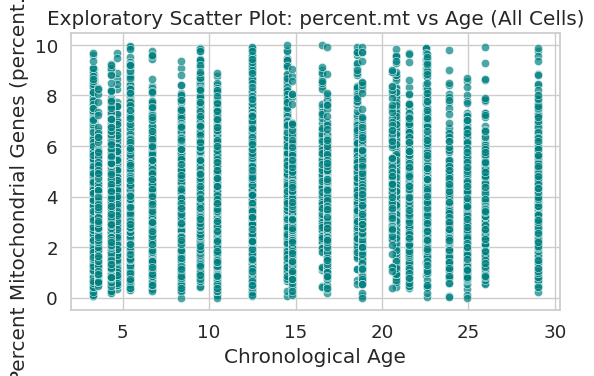

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract Age and percent.mt from the adata.obs dataframe
ages = adata.obs['Age']
percent_mt = adata.obs['percent.mt']

# Create a scatter plot of percent.mt vs Age for all cells
df = adata.obs.copy()
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Age', y='percent.mt', data=df, color='teal', alpha=0.7)
plt.title('Exploratory Scatter Plot: percent.mt vs Age (All Cells)')
plt.xlabel('Chronological Age')
plt.ylabel('Percent Mitochondrial Genes (percent.mt)')
plt.tight_layout()
plt.show()